In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# show all columns
pd.set_option('display.max_columns', None)



In [2]:
# Keras

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers


Using TensorFlow backend.


In [918]:
airbnb = pd.read_csv('./Airbnb/listings_new_2_distr.csv')
airbnb = airbnb.drop(columns=['Unnamed: 0'])

details = pd.read_csv('./Airbnb/details_needed.csv')
details = details.drop(columns=['Unnamed: 0'])

#airbnb_scaled = pd.read_csv('./Airbnb/airbnb_scaled.csv')
#airbnb_scaled = airbnb_scaled.drop(columns=['Unnamed: 0'])


In [919]:
airbnb = details.merge(airbnb, on='id')

In [920]:
airbnb.head()

,id,description,description_lenght,host_id,neighbourhood,latitude,longitude,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
0,2818,Quiet Garden View Room & Super Fast WiFi I'm r...,1000.0,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,today,17,44,44,44,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,strict_14_with_grace_period,f,f,1,2.10,Amsterdam-Oost
1,3209,You will love our spacious (90 m2) bright apar...,1000.0,3806,Westerpark,52.390225,4.873924,160,2008-10-24,within an hour,100.0,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300.0,40.0,2,15.0,4,20,7 weeks ago,0,0,0,47,42,2015-07-31,2018-08-29,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,f,f,1,1.03,Amsterdam-West
2,20168,"Cozy studio on your own private floor, 100% in...",1000.0,59484,Centrum-Oost,52.365087,4.893541,80,2009-12-02,within a few hours,100.0,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,t,Townhouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",NaN,NaN,2,0.0,1,1000,today,0,7,24,198,233,2010-03-02,2018-11-30,87.0,9.0,10.0,9.0,9.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2,2.18,Amsterdam-Centrum
3,25428,"This nicely furnished, newly renovated apt is...",1000.0,56142,Centrum-West,52.373114,4.883668,125,2009-11-20,within a few hours,100.0,f,2.0,2.0,"['email', 'phone', 'reviews']",t,f,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",300.0,40.0,2,10.0,14,60,2 days ago,2,32,44,141,1,2018-01-21,2018-01-21,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.09,Amsterdam-Centrum
4,27886,Stylish and romantic houseboat on fantastic hi...,1000.0,97647,Centrum-West,52.386727,4.892078,150,2010-03-23,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,t,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",0.0,0.0,1,0.0,2,730,today,16,37,54,199,171,2012-01-09,2018-11-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1,2.03,Amsterdam-Centrum


# Prepare data

In [921]:
airbnb_model = airbnb.drop(columns=['id', 'description', 'host_id', 'host_verifications', 'calendar_updated',
                                   'district', 'host_response_time', 'host_response_rate', 'review_scores_accuracy',
                                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                   'review_scores_location', 'review_scores_value'])
# host_since - convert to ordinal

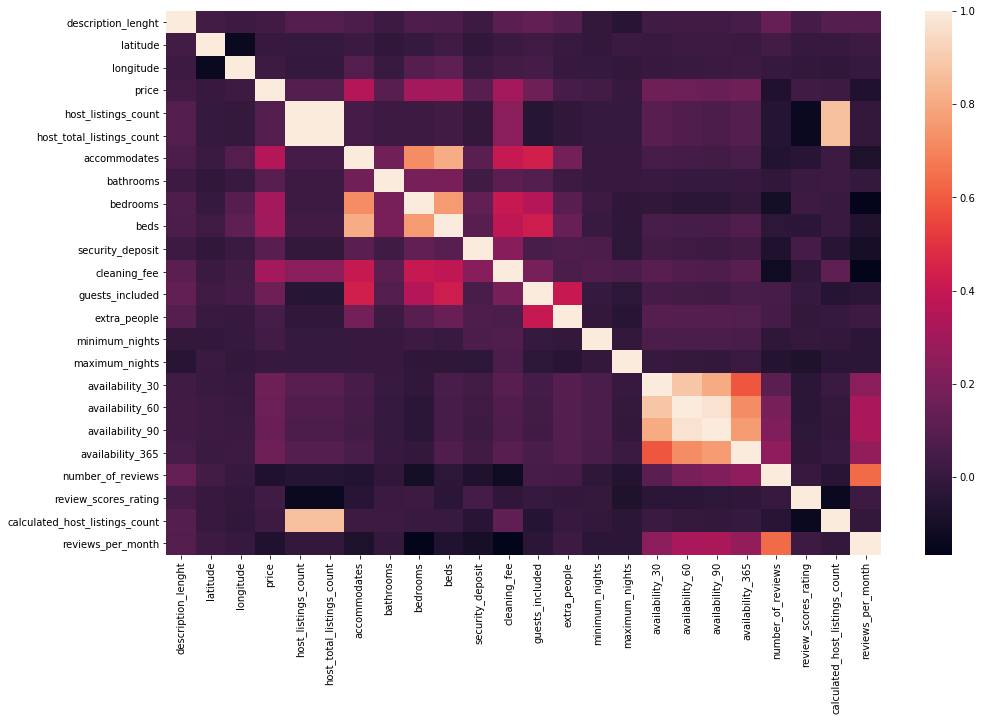

In [922]:
plt.figure(figsize=(16, 10))
sns.heatmap(airbnb_model.corr())

In [923]:
# Drop because of high collinerity
airbnb_model = airbnb_model.drop(columns=['host_total_listings_count', 'calculated_host_listings_count','availability_60'])

In [924]:
#plt.figure(figsize=(16, 10))
#sns.heatmap(airbnb_model.corr())

In [925]:
# Select features
"""
airbnb_model = airbnb[['price', 'description_lenght', 'accommodates', 'property_type', 
                       'room_type',  'bedrooms', 'neighbourhood', 'cleaning_fee', 'extra_people',
                       'security_deposit', 'minimum_nights',
                       'availability_90', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                       'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                       'review_scores_value', 'cancellation_policy', 'instant_bookable', 'host_response_time',
                       'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_total_listings_count']]

"""

"\nairbnb_model = airbnb[['price', 'description_lenght', 'accommodates', 'property_type', \n                       'room_type',  'bedrooms', 'neighbourhood', 'cleaning_fee', 'extra_people',\n                       'security_deposit', 'minimum_nights',\n                       'availability_90', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', \n                       'review_scores_cleanliness',\n                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', \n                       'review_scores_value', 'cancellation_policy', 'instant_bookable', 'host_response_time',\n                       'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_total_listings_count']]\n\n"

In [926]:

airbnb_model.description_lenght.fillna(0, inplace=True)
airbnb_model.bathrooms.fillna(0, inplace=True)
airbnb_model.bedrooms.fillna(0, inplace=True)
airbnb_model.security_deposit.fillna(0, inplace=True)
airbnb_model.cleaning_fee.fillna(0, inplace=True)
airbnb_model.review_scores_rating.fillna(0, inplace=True)
airbnb_model.first_review.fillna(0, inplace=True)
airbnb_model.last_review.fillna(0, inplace=True)
airbnb_model.review_scores_rating.fillna(0, inplace=True)
airbnb_model.reviews_per_month.fillna(0, inplace=True)


In [927]:
airbnb_model.shape

(20030, 37)

In [928]:
airbnb_model = airbnb_model.dropna()
airbnb_model.shape

(20019, 37)

In [929]:
airbnb_model.isnull().sum()

description_lenght                  0
neighbourhood                       0
latitude                            0
longitude                           0
price                               0
host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability

In [930]:
airbnb_model.head()

,description_lenght,neighbourhood,latitude,longitude,price,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1000.0,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,t,1.0,t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,17,44,44,248,2009-03-30,2018-11-28,97.0,t,strict_14_with_grace_period,f,f,2.10
1,1000.0,Westerpark,52.390225,4.873924,160,2008-10-24,f,1.0,t,t,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300.0,40.0,2,15.0,4,20,0,0,47,42,2015-07-31,2018-08-29,96.0,f,moderate,f,f,1.03
2,1000.0,Centrum-Oost,52.365087,4.893541,80,2009-12-02,f,2.0,t,f,t,Townhouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",0.0,0.0,2,0.0,1,1000,0,24,198,233,2010-03-02,2018-11-30,87.0,f,strict_14_with_grace_period,f,f,2.18
3,1000.0,Centrum-West,52.373114,4.883668,125,2009-11-20,f,2.0,t,f,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",300.0,40.0,2,10.0,14,60,2,44,141,1,2018-01-21,2018-01-21,100.0,f,strict_14_with_grace_period,f,f,0.09
4,1000.0,Centrum-West,52.386727,4.892078,150,2010-03-23,t,1.0,t,t,t,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",0.0,0.0,1,0.0,2,730,16,54,199,171,2012-01-09,2018-11-25,99.0,t,strict_14_with_grace_period,f,f,2.03


In [931]:
# Convert to int
airbnb_model[['description_lenght', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'extra_people']] = airbnb_model[['description_lenght', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'extra_people']].astype(int)
airbnb_model[['review_scores_rating', 'reviews_per_month']] = airbnb_model[['review_scores_rating', 'reviews_per_month']].astype(int)

# Convert datetime to ordinal

from datetime import datetime as dt

airbnb_model['host_since'] = pd.to_datetime(airbnb_model['host_since'])
airbnb_model['host_since'] = airbnb_model['host_since'].apply(lambda x: x.toordinal())

airbnb_model['first_review'] = pd.to_datetime(airbnb_model['first_review'])
airbnb_model['first_review'] = airbnb_model['first_review'].apply(lambda x: x.toordinal())

airbnb_model['last_review'] = pd.to_datetime(airbnb_model['last_review'])
airbnb_model['last_review'] = airbnb_model['last_review'].apply(lambda x: x.toordinal())


airbnb_model.dtypes

description_lenght                    int32
neighbourhood                        object
latitude                            float64
longitude                           float64
price                                 int64
host_since                            int64
host_is_superhost                    object
host_listings_count                   int32
host_has_profile_pic                 object
host_identity_verified               object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                             int32
bedrooms                              int32
beds                                  int32
bed_type                             object
amenities                            object
security_deposit                      int32
cleaning_fee                          int32
guests_included                       int64
extra_people                    

In [932]:
col = 'property_type'

conditions = [airbnb_model[col] == 'Apartment', airbnb_model[col] == 'Townhouse',
             airbnb_model[col] == 'Houseboat', airbnb_model[col] == 'Bed and breakfast',
             airbnb_model[col] == 'Boat', airbnb_model[col] == 'Guest suite',
             airbnb_model[col] == 'Loft', airbnb_model[col] == 'Serviced apartment',
             airbnb_model[col] == 'House', airbnb_model[col] == 'Other',
             airbnb_model[col] == 'Condominium', airbnb_model[col] == 'Aparthotel']

choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

airbnb_model["property_type"] = np.select(conditions, choices, default=np.nan)

In [933]:
col = 'room_type'

conditions = [airbnb_model[col] == 'Private room', airbnb_model[col] == 'Entire home/apt',
             airbnb_model[col] == 'Shared room']

choices = [1, 2, 3]

airbnb_model["room_type"] = np.select(conditions, choices, default=np.nan)

In [934]:
col = 'bed_type'

conditions = [airbnb_model[col] == 'Real Bed', airbnb_model[col] == 'Futon',
             airbnb_model[col] == 'Pull-out Sofa', airbnb_model[col] == 'Airbed',
             airbnb_model[col] == 'Couch']

choices = [1, 2, 3, 4, 5]

airbnb_model["bed_type"] = np.select(conditions, choices, default=np.nan)

In [935]:
col = 'instant_bookable'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["instant_bookable"] = np.select(conditions, choices, default=np.nan)

In [936]:
col = 'cancellation_policy'

conditions = [airbnb_model[col] == 'strict_14_with_grace_period', airbnb_model[col] == 'moderate',
             airbnb_model[col] == 'flexible', airbnb_model[col] == 'super_strict_60']

choices = [1, 2, 3, 4]

airbnb_model["cancellation_policy"] = np.select(conditions, choices, default=np.nan)

In [937]:
col = 'neighbourhood'

conditions = [airbnb_model[col] == 'Oostelijk Havengebied - Indische Buurt', airbnb_model[col] == 'Westerpark',
             airbnb_model[col] == 'Centrum-Oost', airbnb_model[col] == 'Centrum-West',
             airbnb_model[col] == 'Bos en Lommer', airbnb_model[col] == 'Zuid',
             airbnb_model[col] == 'De Pijp - Rivierenbuurt', airbnb_model[col] == 'De Baarsjes - Oud-West',
             airbnb_model[col] == 'Oud-Oost', airbnb_model[col] == 'Slotervaart',
             airbnb_model[col] == 'Gaasperdam - Driemond', airbnb_model[col] == 'Oud-Noord',
             
             airbnb_model[col] == 'Noord-Oost', airbnb_model[col] == 'Watergraafsmeer',
             airbnb_model[col] == 'IJburg - Zeeburgereiland', airbnb_model[col] == 'Geuzenveld - Slotermeer',
             airbnb_model[col] == 'Buitenveldert - Zuidas', airbnb_model[col] == 'Bijlmer-Oost',
             airbnb_model[col] == 'Noord-West', airbnb_model[col] == 'De Aker - Nieuw Sloten',
             airbnb_model[col] == 'Osdorp', airbnb_model[col] == 'Bijlmer-Centrum']

choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

airbnb_model["neighbourhood"] = np.select(conditions, choices, default=np.nan)

In [938]:
col = 'host_is_superhost'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["host_is_superhost"] = np.select(conditions, choices, default=np.nan)

In [939]:
col = 'host_has_profile_pic'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["host_has_profile_pic"] = np.select(conditions, choices, default=np.nan)

In [940]:
col = 'host_identity_verified'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["host_identity_verified"] = np.select(conditions, choices, default=np.nan)

In [941]:
col = 'is_location_exact'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["is_location_exact"] = np.select(conditions, choices, default=np.nan)

In [942]:
col = 'require_guest_profile_picture'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["require_guest_profile_picture"] = np.select(conditions, choices, default=np.nan)

In [943]:
col = 'require_guest_phone_verification'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["require_guest_phone_verification"] = np.select(conditions, choices, default=np.nan)

In [944]:
airbnb_model.head()

,description_lenght,neighbourhood,latitude,longitude,price,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1000,1.0,52.365755,4.941419,59,733309,1.0,1,1.0,0.0,0.0,1.0,1.0,2,1,1,2,1.0,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100,50,1,20,3,15,17,44,44,248,733496,737026,97,1.0,1.0,0.0,0.0,2
1,1000,2.0,52.390225,4.873924,160,733339,0.0,1,1.0,1.0,1.0,1.0,2.0,5,1,2,2,1.0,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300,40,2,15,4,20,0,0,47,42,735810,736935,96,0.0,2.0,0.0,0.0,1
2,1000,3.0,52.365087,4.893541,80,733743,0.0,2,1.0,0.0,1.0,2.0,2.0,2,1,1,1,1.0,"{TV,Internet,Wifi,""Paid parking off premises"",...",0,0,2,0,1,1000,0,24,198,233,733833,737028,87,0.0,1.0,0.0,0.0,2
3,1000,4.0,52.373114,4.883668,125,733731,0.0,2,1.0,0.0,0.0,1.0,2.0,3,1,1,1,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",300,40,2,10,14,60,2,44,141,1,736715,736715,100,0.0,1.0,0.0,0.0,0
4,1000,4.0,52.386727,4.892078,150,733854,1.0,1,1.0,1.0,1.0,3.0,1.0,2,1,1,1,1.0,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",0,0,1,0,2,730,16,54,199,171,734511,737023,99,1.0,1.0,0.0,0.0,2


In [945]:
airbnb_model[['neighbourhood', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
              'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
             'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']] = airbnb_model[['neighbourhood', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                                                                                                                          'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
                                                                                                                         'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']].astype(int)

airbnb_model.dtypes


description_lenght                    int32
neighbourhood                         int32
latitude                            float64
longitude                           float64
price                                 int64
host_since                            int64
host_is_superhost                     int32
host_listings_count                   int32
host_has_profile_pic                  int32
host_identity_verified                int32
is_location_exact                     int32
property_type                         int32
room_type                             int32
accommodates                          int64
bathrooms                             int32
bedrooms                              int32
beds                                  int32
bed_type                              int32
amenities                            object
security_deposit                      int32
cleaning_fee                          int32
guests_included                       int64
extra_people                    

##### Amenities

In [946]:
amenities_lst = list(airbnb_model.amenities)
amenities_str = ' '.join(amenities_lst)
amenities_str = amenities_str.replace('{','')
amenities_str = amenities_str.replace('}','')
amenities_str = amenities_str.replace('"','')
amenities_list = [x.strip() for x in amenities_str.split(',')]
set(amenities_list)

amenities = ['Air conditioning', 'Private entrance' 'Breakfast', 'Elevator', 'Essentials', 'Patio or balcony', 'Internet', 'Lockbox', 'Waterfront', 'Washer', '24-hour check-in', 'Kitchen', 'Garden or backyard']

In [947]:
airbnb_model['Private_entrance'] = np.where(airbnb_model['amenities'].str.contains('Private entrance'), 1, 0)
airbnb_model['Breakfast'] = np.where(airbnb_model['amenities'].str.contains('Breakfast'), 1, 0)
airbnb_model['Elevator'] = np.where(airbnb_model['amenities'].str.contains('Elevator'), 1, 0)
airbnb_model['Patio_or_balcony'] = np.where(airbnb_model['amenities'].str.contains('Patio or balcony'), 1, 0)
airbnb_model['Wifi'] = np.where(airbnb_model['amenities'].str.contains('Wifi'), 1, 0)
airbnb_model['Washer'] = np.where(airbnb_model['amenities'].str.contains('Washer'), 1, 0)
airbnb_model['24_hour_check_in'] = np.where(airbnb_model['amenities'].str.contains('24-hour check-in'), 1, 0)
airbnb_model['Kitchen'] = np.where(airbnb_model['amenities'].str.contains('Kitchen'), 1, 0)
airbnb_model['Garden_or_backyard'] = np.where(airbnb_model['amenities'].str.contains('Garden or backyard'), 1, 0)
airbnb_model['TV'] = np.where(airbnb_model['amenities'].str.contains('TV'), 1, 0)
airbnb_model['Bed_linens'] = np.where(airbnb_model['amenities'].str.contains('Bed linens'), 1, 0)

airbnb_model['Air_conditioning'] = np.where(airbnb_model['amenities'].str.contains('Air conditioning'), 1, 0)
airbnb_model['Essentials'] = np.where(airbnb_model['amenities'].str.contains('Essentials'), 1, 0)
airbnb_model['Lockbox'] = np.where(airbnb_model['amenities'].str.contains('Lockbox'), 1, 0)
airbnb_model['Waterfront'] = np.where(airbnb_model['amenities'].str.contains('Waterfront'), 1, 0)


In [948]:
airbnb_model = airbnb_model.drop(columns='amenities')

In [949]:
airbnb_model.shape

(20019, 51)

In [950]:
airbnb_model['Wifi'].value_counts()

1    19459
0      560
Name: Wifi, dtype: int64

In [951]:
airbnb_model.head()

,description_lenght,neighbourhood,latitude,longitude,price,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,1000,1,52.365755,4.941419,59,733309,1,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,15,17,44,44,248,733496,737026,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,1000,2,52.390225,4.873924,160,733339,0,1,1,1,1,1,2,5,1,2,2,1,300,40,2,15,4,20,0,0,47,42,735810,736935,96,0,2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,1000,3,52.365087,4.893541,80,733743,0,2,1,0,1,2,2,2,1,1,1,1,0,0,2,0,1,1000,0,24,198,233,733833,737028,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,1000,4,52.373114,4.883668,125,733731,0,2,1,0,0,1,2,3,1,1,1,1,300,40,2,10,14,60,2,44,141,1,736715,736715,100,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,1000,4,52.386727,4.892078,150,733854,1,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,730,16,54,199,171,734511,737023,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


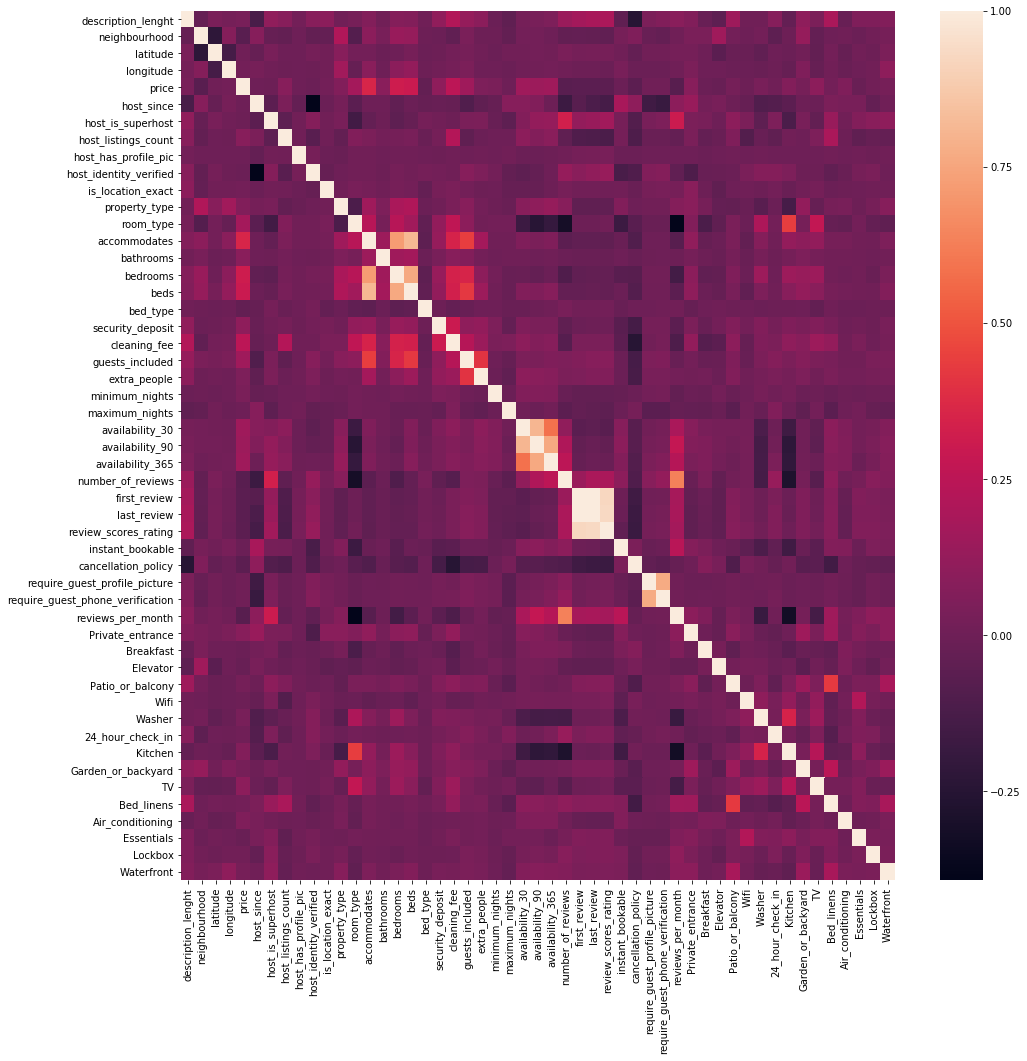

In [952]:
plt.figure(figsize=(16, 16))
sns.heatmap(airbnb_model.corr())

In [953]:
airbnb_model = airbnb_model.drop(columns=['first_review', 'last_review', 'latitude', 'longitude', 
                                          'host_has_profile_pic', 'maximum_nights'])

In [954]:
airbnb_model['Breakfast'].corr(airbnb_model['price'])

-0.011805280191298013

In [955]:
airbnb_model.Waterfront.value_counts()

0    19259
1      760
Name: Waterfront, dtype: int64

In [956]:
airbnb_model.head()

,description_lenght,neighbourhood,price,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,1000,1,59,733309,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,17,44,44,248,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,1000,2,160,733339,0,1,1,1,1,2,5,1,2,2,1,300,40,2,15,4,0,0,47,42,96,0,2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,1000,3,80,733743,0,2,0,1,2,2,2,1,1,1,1,0,0,2,0,1,0,24,198,233,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,1000,4,125,733731,0,2,0,0,1,2,3,1,1,1,1,300,40,2,10,14,2,44,141,1,100,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,1000,4,150,733854,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,16,54,199,171,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


# Remove outliers

In [959]:
airbnb_model.head()

,description_lenght,neighbourhood,price,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,1000,1,59,733309,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,17,44,44,248,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
2,1000,3,80,733743,0,2,0,1,2,2,2,1,1,1,1,0,0,2,0,1,0,24,198,233,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
4,1000,4,150,733854,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,16,54,199,171,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0
5,1000,5,65,733904,0,2,1,1,1,1,2,1,1,2,1,150,15,2,0,3,11,52,295,434,93,0,2,1,1,4,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0
6,570,4,75,733905,1,3,1,1,1,1,2,0,1,1,1,0,0,1,0,2,3,17,137,215,97,0,2,0,0,2,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0


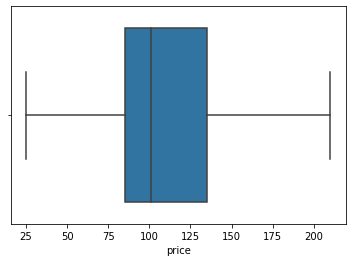

In [917]:
df = airbnb_model[airbnb_model['price'] < 218]
sns.boxplot(x=df['price'])

In [960]:
# Remove outliers

outl = airbnb_model[airbnb_model['price'] < 256]
outl_1 = outl[outl['accommodates'] < 8]
outl_2 = outl_1[outl_1['bedrooms'] < 4]
outl_3 = outl_2[outl_2['beds'] < 4]
outl_4 = outl_3[outl_3['security_deposit'] < 520]
outl_5 = outl_4[outl_4['cleaning_fee'] < 99]
outl_6 = outl_5[outl_5['guests_included'] < 4]
outl_7 = outl_6[outl_6['minimum_nights'] < 20]

In [961]:
outl_7.shape

(10307, 45)

In [962]:
outl_7.head()

,description_lenght,neighbourhood,price,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,1000,1,59,733309,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,17,44,44,248,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
2,1000,3,80,733743,0,2,0,1,2,2,2,1,1,1,1,0,0,2,0,1,0,24,198,233,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
4,1000,4,150,733854,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,16,54,199,171,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0
5,1000,5,65,733904,0,2,1,1,1,1,2,1,1,2,1,150,15,2,0,3,11,52,295,434,93,0,2,1,1,4,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0
6,570,4,75,733905,1,3,1,1,1,1,2,0,1,1,1,0,0,1,0,2,3,17,137,215,97,0,2,0,0,2,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0


# Normalize

In [963]:
min_max_scaler = MinMaxScaler()

scale = min_max_scaler.fit_transform(outl_7[['neighbourhood','description_lenght','host_since',
                                            'host_listings_count', 'property_type', 'room_type', 'accommodates',
                                            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
                                            'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                            'availability_30', 'availability_90', 'availability_365',
                                            'number_of_reviews', 'review_scores_rating',
                                            'cancellation_policy', 'reviews_per_month']])

scale_df = pd.DataFrame(scale, index=outl_7.index, columns=['neighbourhood','description_lenght','host_since',
                                            'host_listings_count', 'property_type', 'room_type', 'accommodates',
                                            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
                                            'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                            'availability_30', 'availability_90', 'availability_365',
                                            'number_of_reviews', 'review_scores_rating',
                                            'cancellation_policy', 'reviews_per_month'])
scale_df = scale_df.reset_index()
scale_df.head()

,index,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,0,0.000000,1.00,0.000000,0.003484,0.000000,0.0,0.0,0.125,0.333333,0.666667,0.0,0.2,0.526316,0.0,0.07722,0.111111,0.566667,0.488889,0.120548,0.393027,0.97,0.000000,0.181818
1,2,0.095238,1.00,0.116541,0.006969,0.090909,0.5,0.0,0.125,0.333333,0.333333,0.0,0.0,0.000000,0.5,0.00000,0.000000,0.000000,0.266667,0.542466,0.369255,0.87,0.000000,0.181818
2,4,0.142857,1.00,0.146348,0.003484,0.181818,0.0,0.0,0.125,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.00000,0.055556,0.533333,0.600000,0.545205,0.270998,0.99,0.000000,0.181818
3,5,0.190476,1.00,0.159774,0.006969,0.000000,0.0,0.0,0.125,0.333333,0.666667,0.0,0.3,0.157895,0.5,0.00000,0.111111,0.366667,0.577778,0.808219,0.687797,0.93,0.333333,0.363636
4,6,0.142857,0.57,0.160043,0.010453,0.000000,0.0,0.0,0.000,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.00000,0.055556,0.100000,0.188889,0.375342,0.340729,0.97,0.333333,0.181818


In [964]:
outl_8_drop = outl_7.drop(columns=['neighbourhood','description_lenght','host_since',
                                            'host_listings_count', 'property_type', 'room_type', 'accommodates',
                                            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
                                            'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                            'availability_30', 'availability_90', 'availability_365',
                                            'number_of_reviews', 'review_scores_rating',
                                            'cancellation_policy', 'reviews_per_month'])
outl_8_drop = outl_8_drop.reset_index()

In [965]:
airbnb_scaled = pd.merge(scale_df, outl_8_drop, on='index')

In [966]:
airbnb_scaled = airbnb_scaled.drop(columns='index')

In [967]:
# Move 'price' column to front
airbnb_scaled = airbnb_scaled.set_index('price').reset_index()

In [968]:
airbnb_scaled.head()

,price,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,host_is_superhost,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,59,0.000000,1.00,0.000000,0.003484,0.000000,0.0,0.0,0.125,0.333333,0.666667,0.0,0.2,0.526316,0.0,0.07722,0.111111,0.566667,0.488889,0.120548,0.393027,0.97,0.000000,0.181818,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,80,0.095238,1.00,0.116541,0.006969,0.090909,0.5,0.0,0.125,0.333333,0.333333,0.0,0.0,0.000000,0.5,0.00000,0.000000,0.000000,0.266667,0.542466,0.369255,0.87,0.000000,0.181818,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
2,150,0.142857,1.00,0.146348,0.003484,0.181818,0.0,0.0,0.125,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.00000,0.055556,0.533333,0.600000,0.545205,0.270998,0.99,0.000000,0.181818,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0
3,65,0.190476,1.00,0.159774,0.006969,0.000000,0.0,0.0,0.125,0.333333,0.666667,0.0,0.3,0.157895,0.5,0.00000,0.111111,0.366667,0.577778,0.808219,0.687797,0.93,0.333333,0.363636,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0
4,75,0.142857,0.57,0.160043,0.010453,0.000000,0.0,0.0,0.000,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.00000,0.055556,0.100000,0.188889,0.375342,0.340729,0.97,0.333333,0.181818,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0


In [969]:
#test_1 = airbnb_scaled.drop

### Regression models

In [970]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [971]:
y = airbnb_scaled['price'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [972]:
#### Random Forrest Regressor

rfr_2 = RandomForestRegressor(max_depth=14).fit(X_train, y_train)
y_pred_train_2 = rfr_2.predict(X_train)
y_pred_test_2 = rfr_2.predict(X_test)
score_train_2 = performance_metric(y_train, y_pred_train_2)

score_test_2 = performance_metric(y_test, y_pred_test_2)

print('\nTrain set',score_train_2, 'Test set', score_test_2)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Train set 0.7116838403513868 Test set 0.3795349576818601


In [905]:
from sklearn.linear_model import LinearRegression

y = airbnb_scaled['price'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression().fit(X_train, y_train)

In [906]:
y_pred = regressor.predict(X_test)

test_set_r2 = r2_score(y_test, y_pred)
print('R-squared:',test_set_r2)

R-squared: 0.402891382578045


#### KERAS

In [821]:
airbnb_scaled.shape

(15886, 45)

In [819]:
# Convert data to numpy arrays
dataset = airbnb_scaled.values

In [820]:
Y = dataset[:,0]
X = dataset[:,1:]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(12708, 44) (1589, 44) (1589, 44) (12708,) (1589,) (1589,)


In [822]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(44,)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='linear'),
])

In [823]:
# telling which algorithm use for optimization, what function to use for loss optimization

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mean_absolute_error'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               5760      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 104,833
Trainable params: 104,833
Non-trainable params: 0
_________________________________________________________________
None


In [824]:
# Visualizing NN
from keras.utils import plot_model

#SVG(model_to_dot(model,  show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))
#plot_model(model, show_shapes=True, show_layer_names=False, to_file='model.png')


In [825]:
# Training the data


hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=25,
          validation_data=(X_val, Y_val))

Train on 12708 samples, validate on 1589 samples
Epoch 1/25
12708/12708 [==============================] - 1s 105us/step - loss: 2612.1849 - mse: 2612.1853 - mean_absolute_error: 37.3756 - val_loss: 1297.5879 - val_mse: 1297.5878 - val_mean_absolute_error: 27.9130
Epoch 2/25
12708/12708 [==============================] - 1s 76us/step - loss: 1409.4753 - mse: 1409.4749 - mean_absolute_error: 28.9964 - val_loss: 1255.7540 - val_mse: 1255.7540 - val_mean_absolute_error: 27.6032
Epoch 3/25
12708/12708 [==============================] - 1s 76us/step - loss: 1385.8788 - mse: 1385.8793 - mean_absolute_error: 28.7782 - val_loss: 1243.8968 - val_mse: 1243.8966 - val_mean_absolute_error: 27.0738
Epoch 4/25
12708/12708 [==============================] - 1s 76us/step - loss: 1368.8581 - mse: 1368.8575 - mean_absolute_error: 28.5498 - val_loss: 1225.2303 - val_mse: 1225.2303 - val_mean_absolute_error: 26.7875
Epoch 5/25
12708/12708 [==============================] - 1s 76us/step - loss: 1355.4811 -

In [826]:
_, train_mse, train_mean_absolute_error = model.evaluate(X_train, Y_train)
_, test_mse, test_mean_absolute_error = model.evaluate(X_test, Y_test)

#_, train_mean_absolute_error = model.evaluate(X_train, Y_train)
#_, test_mean_absolute_error = model.evaluate(X_test, Y_test)

print('\ntrain_mse:', train_mse, 'train_mean_absolute_error:', train_mean_absolute_error, '\ntest_mse:', test_mse, 
     'test_mean_absolute_error:', test_mean_absolute_error)

1589/1589 [==============================] - 0s 27us/step

train_mse: 1104.8170166015625 train_mean_absolute_error: 25.280776977539062 
test_mse: 1322.27294921875 test_mean_absolute_error: 27.334619522094727


In [758]:
x = model.predict(X_test)
print(x[1080])

percentage = test_mean_absolute_error/123.69633733456448 * 100
percentage

[221.49239]


30.32954842136664

In [759]:
Y_test[1080]

235.0

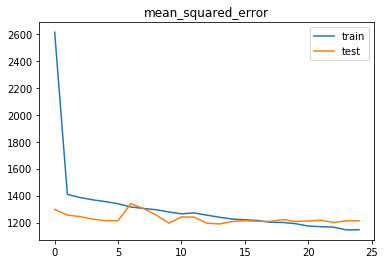

In [827]:
# plot mean_squared_error

plt.title('mean_squared_error')
plt.plot(hist.history['mse'], label='train')
plt.plot(hist.history['val_mse'], label='test')
plt.legend()
plt.show()

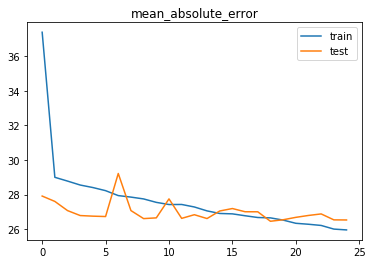

In [828]:
# plot mean_absolute_error

plt.title('mean_absolute_error')
plt.plot(hist.history['mean_absolute_error'], label='train')
plt.plot(hist.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()

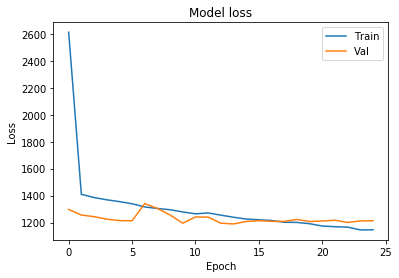

In [829]:
# visualize the training loss and the validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### kernel_regularizer & Dropout

In [166]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(53,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.3),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l1(0.01)),
])

In [167]:
# telling which algorithm use for optimization, what function to use for loss optimization

model_3.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mean_absolute_error'])

print(model_3.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               6912      
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 512)             

In [168]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=500, epochs=100,
          validation_data=(X_val, Y_val))

Train on 12305 samples, validate on 1538 samples
Epoch 1/100
12305/12305 [==============================] - 1s 93us/step - loss: 11738.4402 - mse: 11619.1963 - mean_absolute_error: 92.9216 - val_loss: 2725.0179 - val_mse: 2606.8567 - val_mean_absolute_error: 41.8956
Epoch 2/100
12305/12305 [==============================] - 0s 29us/step - loss: 2752.4496 - mse: 2636.9490 - mean_absolute_error: 40.3018 - val_loss: 1938.9618 - val_mse: 1826.1136 - val_mean_absolute_error: 32.6849
Epoch 3/100
12305/12305 [==============================] - 0s 28us/step - loss: 2033.5613 - mse: 1922.8076 - mean_absolute_error: 34.2994 - val_loss: 1560.8038 - val_mse: 1452.2178 - val_mean_absolute_error: 29.3834
Epoch 4/100
12305/12305 [==============================] - 0s 29us/step - loss: 1776.7851 - mse: 1669.8712 - mean_absolute_error: 31.9384 - val_loss: 1474.6384 - val_mse: 1369.4391 - val_mean_absolute_error: 27.9164
Epoch 5/100
12305/12305 [==============================] - 0s 28us/step - loss: 1696.

Epoch 76/100
12305/12305 [==============================] - 0s 28us/step - loss: 1287.3043 - mse: 1212.2332 - mean_absolute_error: 26.8446 - val_loss: 1355.3852 - val_mse: 1280.3740 - val_mean_absolute_error: 26.6812
Epoch 77/100
12305/12305 [==============================] - 0s 27us/step - loss: 1287.0470 - mse: 1212.1876 - mean_absolute_error: 26.8487 - val_loss: 1417.1959 - val_mse: 1342.4882 - val_mean_absolute_error: 27.1440
Epoch 78/100
12305/12305 [==============================] - 0s 27us/step - loss: 1264.7201 - mse: 1190.0527 - mean_absolute_error: 26.6478 - val_loss: 1432.4912 - val_mse: 1358.0151 - val_mean_absolute_error: 27.1870
Epoch 79/100
12305/12305 [==============================] - 0s 28us/step - loss: 1278.9079 - mse: 1204.4338 - mean_absolute_error: 26.6816 - val_loss: 1375.5204 - val_mse: 1301.1034 - val_mean_absolute_error: 26.8811
Epoch 80/100
12305/12305 [==============================] - 0s 27us/step - loss: 1283.0165 - mse: 1208.7415 - mean_absolute_error: 2

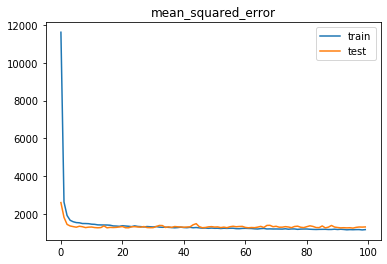

In [169]:
# plot mean_squared_error

plt.title('mean_squared_error')
plt.plot(hist_3.history['mse'], label='train')
plt.plot(hist_3.history['val_mse'], label='test')
plt.legend()
plt.show()

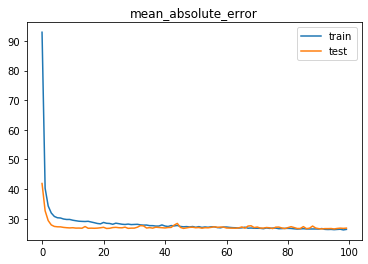

In [170]:
# plot mean_absolute_error

plt.title('mean_absolute_error')
plt.plot(hist_3.history['mean_absolute_error'], label='train')
plt.plot(hist_3.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()

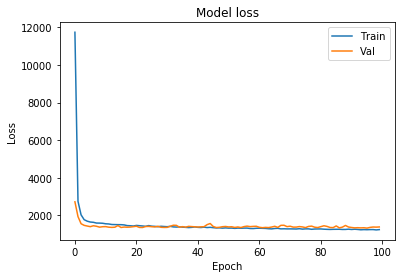

In [171]:
# visualize the training loss and the validation loss

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [172]:
x = model_3.predict(X_test)
print(x[500])

percentage = test_mean_absolute_error/123.69633733456448 * 100
percentage

[135.79387]


26.653234008130188

In [173]:
Y_test[500]

99.0

### CNN

In [198]:
model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(53,)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_cnn.add(Conv2D(64, (5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))
        

ValueError: Input 0 is incompatible with layer conv2d_1: expected ndim=4, found ndim=2

In [ ]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test)
          #callbacks=[history])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#print('Test loss:', score[0])
#print('Test mae:', score[1])